# Spot-checking Algorithms

After data-preprocessing and Exploratory Data Analysis, you want to quickly gain some intuition about what kind of machine learning algorithms work best. Every ML algorithm has certain assumptions about the dataset, with sufficient experience with using such algorithms one can often narrow down the design space to a few. 

For others, worry not, there is spot-checking! In short, on your pre-processed datasets it is often good to quickly evaluate a suite of algorithms and compare which ones perform well. We then pick the ones that look interesting and then further our analysis. Another challenge is feature selection.

1. Feature selection by recursive feature elimination.
2. Spot-checking different algorithms.

In [1]:
import numpy as np
import pandas as pd
import urllib
import seaborn as sns
from __future__ import division
%matplotlib inline
# url with dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
# download the file
raw_data = urllib.urlopen(url)
# load the CSV file as a numpy matrix
dataset = np.loadtxt(raw_data, delimiter=",")
# separate the data from the target attributes
X = dataset[:,0:8]
y = dataset[:,8]

/Library/Python/2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Random Classifier: 0.65
Majority classifer: 0.651041666667


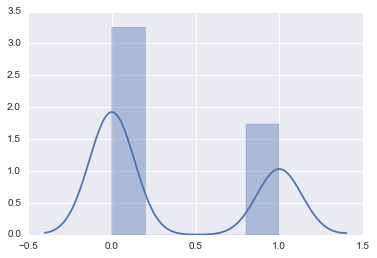

In [4]:
from sklearn import metrics
sns.distplot(y)
print('Random Classifier: {:.2f}'.format(metrics.accuracy_score(y, [0 for ii in y.tolist()])))
print 'Majority classifer:', (y.shape[0] - np.sum(y))/y.shape[0]

## Data Normalization

* Normalization involves replacing nominal features, so that each of them would be in the range from 0 to 1.
* Standardization, it involves data pre-processing, after which each feature has an average 0 and 1 dispersion.


In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
norm = Normalizer()
stand = StandardScaler()
normalized_X = norm.fit_transform(X)
standardized_X = stand.fit_transform(X)

## Test-Train Split

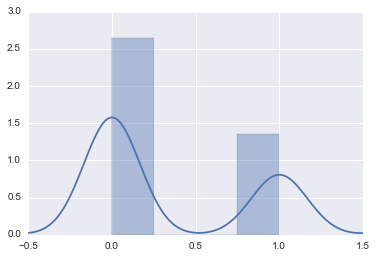

In [10]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train_st, X_test_st, y_train_st, y_test_st = train_test_split(standardized_X, y, 
                                                                test_size=0.33, random_state=42)
sns.distplot(y_test)

As seen above, sklearn's train_test_split preserves the distribution of classes amongst the train and test datasets.

## Feature Selection

* While Future Engineering is quite a creative process and relies more on intuition and expert knowledge, there are plenty of ready-made algorithms for Feature Selection.
* Tree algorithms allow to compute the informativeness of features.

In [11]:
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X_train, y_train)
# display the relative importance of each attribute
print(model.feature_importances_)

[ 0.10392783  0.25904764  0.08379105  0.07560493  0.07587352  0.14206857
  0.09772928  0.16195719]


### Feature Selection via Recursive Elimination

**Given an external estimator** that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to **select features by recursively considering smaller and smaller sets of features.** 

* First, the estimator is trained on the initial set of features and weights are assigned to each one of them. 
* Then, features whose absolute weights are the smallest are pruned from the current set features. 
* That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

#### NOTE: 

* RFE is used to **rank the 'subset of features'** that perform well together for the given estimator/model, **NOT the relative feature importance** unlike methods like Chi-Square and methods of Tree algorithms.

* Never do feature selection on training data. "*… should do feature selection on a different dataset than you train [your predictive model] on … the effect of not doing this is you will overfit your training data.*"


In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
model = LogisticRegression()
#model = SVR(kernel="linear")
# create the RFE model and select 3 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True False False False False  True  True False]
[1 2 4 5 6 1 1 3]


## Naive Bayes

Is also one of the most well-known machine learning algorithms, the main task of which is to restore the density of data distribution of the training sample. This method often provides good quality in multiclass classification problems.

In [49]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print 'Confusion Matrix: \n',(metrics.confusion_matrix(expected, predicted))


GaussianNB()
             precision    recall  f1-score   support

        0.0       0.81      0.79      0.80       168
        1.0       0.61      0.63      0.62        86

avg / total       0.74      0.74      0.74       254

Confusion Matrix: 
[[133  35]
 [ 32  54]]


## Logistic Regression

Most often used for solving tasks of classification (binary), but multiclass classification (the so-called one-vs-all method) is also allowed. The advantage of this algorithm is that there’s the probability of belonging to a class for each object at the output.

In [56]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))


             precision    recall  f1-score   support

        0.0       0.81      0.85      0.83       168
        1.0       0.67      0.62      0.64        86

avg / total       0.76      0.77      0.77       254

[[142  26]
 [ 33  53]]


### Decision Trees

Classification and Regression Trees (CART) are often used in problems, in which objects have category features and used for regression and classification problems.

In [57]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=6)
model.fit(X_train, y_train)
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))


             precision    recall  f1-score   support

        0.0       0.83      0.71      0.77       168
        1.0       0.56      0.72      0.63        86

avg / total       0.74      0.72      0.72       254

[[120  48]
 [ 24  62]]


In [58]:
from sklearn import metrics
from sklearn.svm import SVC
# fit a SVM model to the data
model = SVC(C=1.0, kernel='linear')
model.fit(X_train, y_train)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

             precision    recall  f1-score   support

        0.0       0.81      0.83      0.82       168
        1.0       0.65      0.62      0.63        86

avg / total       0.75      0.76      0.75       254

[[139  29]
 [ 33  53]]


So far the best accuracy! But now we need to refine the model hyperparameters. For Support Vector Classification there are two hyperparameters: C and gamma. We can evaluate all of this 

In [59]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.grid_search import GridSearchCV
# prepare a range of alpha values to test
C = np.array([1,0.1,0.01,0.001,0.0001])
# create and fit a ridge regression model, testing each alpha
model = SVC()
grid = GridSearchCV(estimator=model, param_grid=dict(C=C), cv=3, verbose=3)
grid.fit(X_train, y_train)


Fitting 3 folds for each of 5 candidates, totalling 15 fits
[CV] C=1.0 ...........................................................
[CV] .................................. C=1.0, score=0.645349 -   0.0s
[CV] C=1.0 ...........................................................
[CV] .................................. C=1.0, score=0.645349 -   0.0s
[CV] C=1.0 ...........................................................
[CV] .................................. C=1.0, score=0.647059 -   0.0s
[CV] C=0.1 ...........................................................
[CV] .................................. C=0.1, score=0.645349 -   0.0s
[CV] C=0.1 ...........................................................
[CV] .................................. C=0.1, score=0.645349 -   0.0s
[CV] C=0.1 ...........................................................
[CV] .................................. C=0.1, score=0.647059 -   0.0s
[CV] C=0.01 ..........................................................
[CV] ............

[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    0.2s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e+00,   1.00000e-01,   1.00000e-02,   1.00000e-03,
         1.00000e-04])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=3)

In [60]:
print(grid.best_score_)
print(grid.best_estimator_.C)

0.645914396887
1.0


### What's next?

In the next post or tutorial, I'll be elaborating more about **ROC Analysis**. An important topic for interviews and for practical machine learning. I also want to do a tutorial on different methods for **Feature Selection** since its something I myself have been looking into currently. 